In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [2]:
%matplotlib inline

In [2]:
df_patients = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx","Patients", parse_dates=["DateOfBirth"])
df_ed_visits = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx",'EDVisits')
df_ambulatory_visits = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx","AmbulatoryVisits")
df_re_admission_registry = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx","ReAdmissionRegistry")
df_discharges = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx","Discharges")
df_providers = pd.read_excel("/Users/tina/Downloads/HospitalDatabase.xlsx","Providers")
# df_ed_unique
df_patients.head(10)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090000,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762000,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635000,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950000,Male,White,English
5,6,Jerrilyn,Kane,1969-03-30 09:36:56.550000,Male,White,English
6,7,Skipton,Bar,1975-11-25 22:23:53.525000,Male,White,English
7,8,Alexandra,Green,1967-06-16 16:37:21.694000,Male,White,English
8,9,Devlin,Black,1974-09-24 23:43:46.185000,Male,White,English
9,10,Granny,Man,1969-09-15 11:20:42.218000,Male,White,English


In [51]:
newdf = pd.DataFrame(df_patients)
# [(df_patients['FirstName'].str.contains("lau", case = False) ) | (df_patients['LastName'].str.contains("lau",case = False))]

In [52]:
newdf

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090000,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762000,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635000,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950000,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761000,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814000,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884000,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569000,Male,Black/African-American,English


In [ ]:
# Add column 'Age' in Patient table.
# Calculating Age of Patients and including in the dataframe
newdf['Age'] = (pd.to_datetime(date.today()) - pd.to_datetime(newdf['DateOfBirth']) ) / 365 
#Converting Age to Integer
newdf['Age_int'] = newdf['Age'].dt.days
#tod = date.today()
#print(type(newdf))

In [54]:
# Get Data from the sheet "Discharges"
df_discharges.head(10)
# Filter patients with PrimaryDiagnosis as 'Stroke'
df_stroke = df_discharges.set_index('PrimaryDiagnosis').filter(like='Str', axis=0)
# df_stroke = df_discharges.query("PrimaryDiagnosis==Stroke")  #df_discharges[
print(df_stroke)

                  AdmissionID  PatientID AdmissionDate   
PrimaryDiagnosis                                         
Stroke                    203         85    2018-01-05  \
Stroke                    207        123    2018-01-09   
Stroke                    444         95    2018-01-06   
Stroke                     27        335    2018-01-27   
Stroke                     12        159    2018-01-12   
...                       ...        ...           ...   
Stroke                    415        336    2018-01-27   
Stroke                    102        642    2018-02-18   
Stroke                      9        131    2018-01-09   
Stroke                     57         56    2018-01-04   
Stroke                     47        602    2018-02-16   

                           DischargeDate DischargeDisposition   
PrimaryDiagnosis                                                
Stroke           2018-01-19 07:59:56.098                 Home  \
Stroke           2018-01-13 08:30:15.574          

In [55]:
# Join Patient data (with Age) and Discharge data filtered with Stroke
join_df = pd.merge(newdf, df_stroke,  on = 'PatientID', how='inner')
#join_df.count()
print(join_df)

    PatientID  FirstName  LastName                 DateOfBirth  Gender   
0          10     Granny       Man  1969-09-15 11:20:42.218000    Male  \
1          14        Gan        Yu  1970-06-02 06:22:54.675000    Male   
2          19  Daugherty    Conner  1960-04-04 10:00:34.189000    Male   
3          30        Ala   Halpert  1986-11-26 10:44:22.628000  Female   
4          35       Fred       Tye  1966-04-14 06:01:07.169000  Female   
..        ...        ...       ...                         ...     ...   
63        601    Aurelie    Lerner  1983-07-24 02:55:54.675000    Male   
64        602     Marjie     Walsh  1982-06-12 17:17:14.100000    Male   
65        611      Adolf     Ormes  1975-12-04 05:13:13.613000    Male   
66        642      Jerde  Endrizzi  1961-04-30 14:54:37.810000  Female   
67        672       Mair       LLC  1970-04-28 18:19:25.489000    Male   

                      Race Language  AdmissionID AdmissionDate   
0                    White  English          

In [ ]:
mean_age_str = str(join_df["Age"].mean())  # Here I've used Mean as the formula. Can use Average or Median as well
mean_age = mean_age_str.split()
print("Mean Age For Patients Prone to Stroke:" ,mean_age[0])

In [58]:
# Q 29. Which demographic patients are prone to get stroke?
race_prone_to_stroke = join_df.groupby(["Race"]).count()["PatientID"]
print(race_prone_to_stroke)

Race
Black/African-American    40
White                     28
Name: PatientID, dtype: int64


In [16]:
#Q 23 . Which reason of visit has maximum mortality rate.
df_discharges.loc[df_discharges["ExpectedMortality"].idxmax()]

AdmissionID                                    190
PatientID                                      572
AdmissionDate                  2018-02-14 00:00:00
DischargeDate           2018-02-25 13:02:30.113000
DischargeDisposition                       Expired
Service                                  Neurology
PrimaryDiagnosis                         Pneumonia
ExpectedLOS                              10.372029
ExpectedMortality                         0.989945
Name: 88, dtype: object

In [ ]:
#Q 27. Which departmentID has maximum number of visits scheduled.
by_dept = df_ambulatory_visits.groupby("VisitDepartmentID").count()["DateScheduled"]
by_dept.plot(kind='bar',title="Visits Scheduled", ylabel='Scheduled',
         xlabel='VisitDepartmentID')

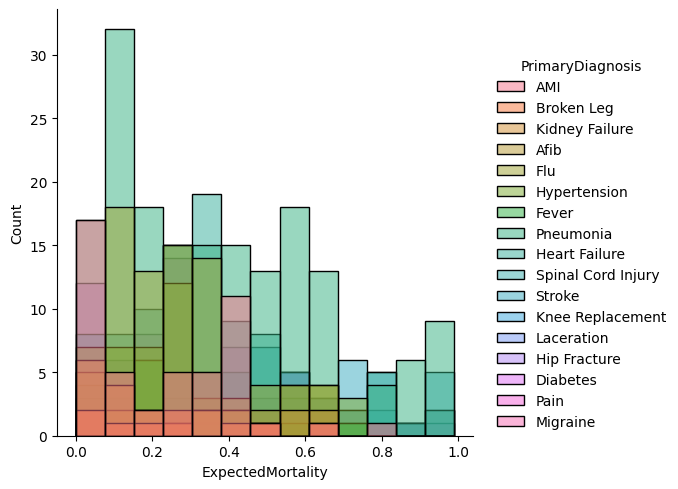

In [7]:
# Q 26: Plot a graph to show the distribution of expected mortality.
mortality = sns.displot(df_discharges, x="ExpectedMortality", hue="PrimaryDiagnosis")


In [28]:
#Q 28. Find the visit type with maximum 'No Show'.

visittypeMaxNoShow = df_ambulatory_visits.groupby("VisitType").count()["VisitStatus"]
# df_noshow = df_ambulatory_visits.set_index('VisitStatus').filter(like='No Show', axis=0)
# var1 = df_ambulatory_visits.groupby("VisitType")["VisitStatus"].max()
print(visittypeMaxNoShow.head(1))

VisitType
Follow Up    336
Name: VisitStatus, dtype: int64


In [ ]:
# Q 34. Create a WordCloud Chart with Reason For Visit

text = df_ed_visits["ReasonForVisit"]
wordcloud = plt.wordcloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# Q 37. Display the data where actual LOS is greater than expected LOS.
df_discharges['ActualLOS'] = (pd.to_datetime(df_discharges['DischargeDate']) - pd.to_datetime(df_discharges['AdmissionDate'])).dt.seconds/3600
result_df = df_discharges.loc[df_discharges['ActualLOS'] > df_discharges['ExpectedLOS']]
print(result_df)

In [29]:
# Q 36. Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120)
df_ambulatory_visits["PatientMRN"][(df_ambulatory_visits["BloodPressureSystolic"]>180)  & (df_ambulatory_visits["BloodPressureDiastolic"]>120) ].count()

101

In [13]:
#Q 30. Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.
df_providers.loc[df_providers['ProviderID'].between(11, 20) & df_providers['ProviderSpecialty']]


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862
16,17,Kent Kendall,Cardiology,2001-12-22 11:18:32.919
17,18,Ryan Kevin,Cardiology,2003-01-14 21:16:34.778
18,19,Tyler Conner,Cardiology,2003-07-09 02:41:40.410
19,20,Bailey Barret,Cardiology,2003-08-20 16:05:50.179


In [27]:
#Q 31. If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name.

# ("Mr."+df_patients["FirstName"]+" "+df_patients["LastName"]).where(df_patients['Gender'] == 'Male').dropna()  --correct for males
df_patients.loc[df_patients['Gender'] == 'Male', 'full_name'] = ("Mr."+df_patients["FirstName"]+" "+df_patients["LastName"])
df_patients.loc[df_patients['Gender'] == 'Female', 'full_name'] = ("Ms."+df_patients["FirstName"]+" "+df_patients["LastName"])
# df.loc[df['first_name'] != 'Bill', 'name_match'] = 'Mismatch'
print(df_patients)

     PatientID FirstName  LastName                 DateOfBirth Gender   
0            1     Lanni       Sue         1960-01-01 00:00:00   Male  \
1            2       Far     Myers  1985-11-15 02:08:42.090000   Male   
2            3   Devlin    Michael  1976-04-15 02:52:09.762000   Male   
3            4   Carmine     Texas  1968-10-15 03:32:13.635000   Male   
4            5     Tann       Bama  1962-05-01 19:12:58.950000   Male   
..         ...       ...       ...                         ...    ...   
940        941       Wat   Fideler  1986-05-26 00:01:19.761000   Male   
941        942    Wandie  Baythrop  1970-06-10 21:41:03.814000   Male   
942        943   Diahann   Smeeton  1983-01-08 21:49:27.884000   Male   
943        944  Panchito   Sharple  1963-06-05 07:57:05.569000   Male   
944        945     Walsh    Calvie  1972-08-06 03:40:03.454000   Male   

                       Race Language            full_name  
0                     White  English         Mr.Lanni Sue  
1  

In [33]:
#Q 38. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.
df_patients["FirstName"].loc[df_patients['PatientID'].between(101, 200)] +" "+ df_patients["LastName"].loc[df_patients['PatientID'].between(101, 200)] 

100       Calla Wasiela
101      Gipsy Frankton
102       Jethro Wharin
103         Viv Aylward
104     Swift Dreschler
             ...       
195    Cathlene Kidwell
196       Noam Laguerre
197        Arie Bayless
198      Janaye O'Mohun
199          Fonz Group
Length: 100, dtype: object

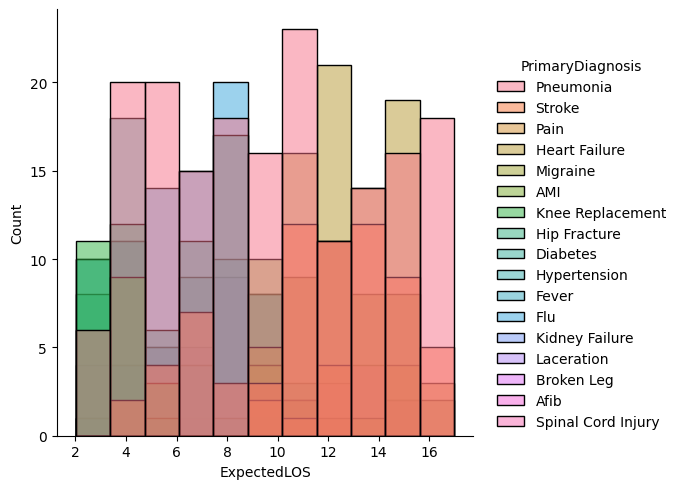

In [35]:
# Q 33. Plot a graph to show the distribution of expected length of stay.

mortality = sns.displot(df_discharges, x="ExpectedLOS", hue="PrimaryDiagnosis")

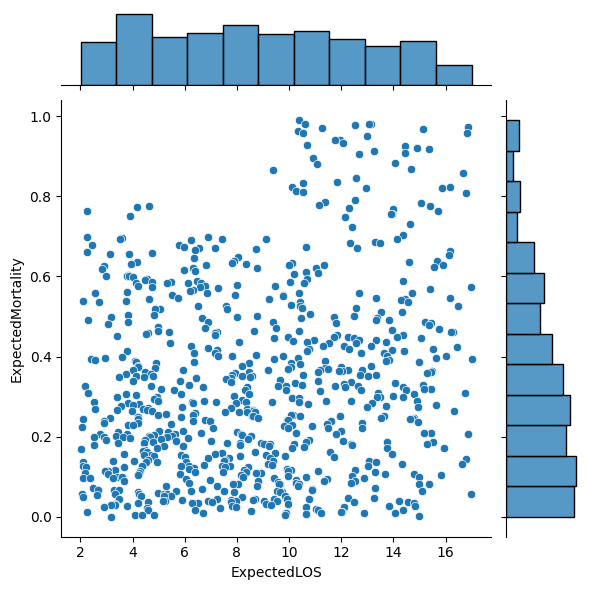

In [7]:
# Q 40. Create a jointplot on expected mortality & expected length of stay.
sns.jointplot(data=df_discharges, x='ExpectedLOS', y='ExpectedMortality', palette='Set2')  #, kind='kde'
plt.show()

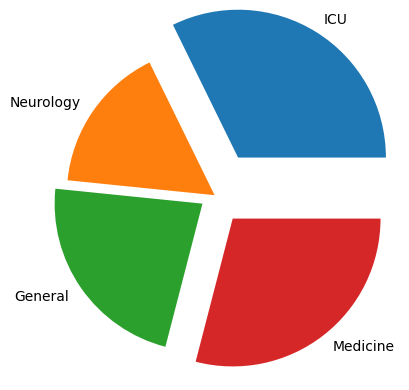

In [18]:
#Q 32. Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] 
# & explode the wedge with highest LOS.

service = ["ICU", "Neurology", "General", "Medicine"] 
ExpectedLOS = [10,5,7,9]
# Creating explode data
explode = (0.3, 0.0, 0.1, 0.2)
# fig = plt.figure(figsize =(10, 7))
# plt.pie(ExpectedLOS, labels = service)                     # Basic Pie Chart
plt.pie(ExpectedLOS, labels = service, explode = explode)    # Pie Chart with exploding wedges
# ALTERNATIVE Way of doing exploding wedges in Pie Chart
# Wedge properties
# fig, ax = plt.subplots(figsize =(10, 7))
# # Creating color parameters
# colors = ( "orange", "cyan", "brown",
#           "grey", "indigo", "beige")
# wp = { 'linewidth' : 1, 'edgecolor' : "blue" }
# wedges, texts, autotexts = ax.pie(ExpectedLOS,
#                                   explode = explode,
#                                   labels = service,
#                                   shadow = True,
#                                   colors = colors,
#                                   startangle = 90,
#                                   wedgeprops = wp,
#                                   textprops = dict(color ="magenta"))
# ax.legend(wedges, service,
#           title ="Service",
#           loc ="center left",
#           bbox_to_anchor =(1, 0, 0.5, 1))
 
# plt.setp(autotexts, size = 8, weight ="bold")
# ax.set_title("Customizing pie chart")

plt.show()

In [25]:
#Q 25. Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension'.
# Create a new column to show your analysis.
bins = [0.01,0.30,0.40,0.50,0.80]
labels = ['Mild Hypertension','Moderate ','High Hypertension','Severe Hypertension']
df_re_admission_registry['Hypertension_Type'] = pd.cut(df_re_admission_registry['ExpectedMortality'], bins, labels = labels, include_lowest = True, right=False)
df_re_admission_registry

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Hypertension_Type
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,Mild Hypertension
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,Severe Hypertension
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,Mild Hypertension
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,Moderate
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,High Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,Moderate
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,Mild Hypertension
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,Severe Hypertension
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,Severe Hypertension


In [46]:
#Q 22. Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)
# df_re_admission_registry["ExpectedLOS"].groupby("Service").mean()
# groupby(['col5', 'col2']).size().groupby(level=1).max()
average_LOS = df_re_admission_registry.groupby(["Service","DischargeDisposition"]).count()["ExpectedLOS"]
print(average_LOS)  

Service           DischargeDisposition
Cardiology        Expired                  15
                  Home                     75
                  Transfer                  5
General Medicine  Expired                  18
                  Home                    229
                  Transfer                 16
Hospitalist       Expired                  10
                  Home                     88
                  Transfer                  3
ICU               Expired                  29
                  Home                    110
                  Transfer                 12
Neurology         Expired                  27
                  Home                     36
                  Transfer                  2
Orthopeadics      Expired                   5
                  Home                     39
                  Transfer                  1
Name: ExpectedLOS, dtype: int64


In [48]:
#Q 35. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.
arr = np.arange(1,31).reshape(6,5)
slice1 = arr[0,3:]
slice2 = arr[4:,3:]
print(slice1)
print(slice2)
required_elements = np.concatenate((slice1.flatten(), slice2.flatten()))
for element in required_elements:
    if element < 6:
        print("-1")
    else:
        print("99")

[4 5]
[[24 25]
 [29 30]]
-1
-1
99
99
99
99


In [5]:
# Q 39. Delete the column 'DischargeDispostion' iteratively.
del df_discharges['DischargeDisposition']

df_discharges

KeyError: 'DischargeDisposition'